<a href="https://colab.research.google.com/github/hughliang/IntroML/blob/main/DigitRecogMlp07032022_Liang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 1: Tensor (https://www.youtube.com/watch?v=BzcBsTou0C0&t=981s)

In [2]:
import torch

x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [5]:
x = torch.zeros([2,5])
print(x)
x.shape

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


torch.Size([2, 5])

In [6]:
y = torch.rand([2,5])
print(y)

tensor([[0.7441, 0.8241, 0.9542, 0.8851, 0.3886],
        [0.4535, 0.8741, 0.9080, 0.4661, 0.0328]])


In [8]:
y.view([-1,10])

tensor([[0.7441, 0.8241, 0.9542, 0.8851, 0.3886, 0.4535, 0.8741, 0.9080, 0.4661,
         0.0328]])

PART 2: Data Loading (https://www.youtube.com/watch?v=i2yPxY2rOzs)

In [10]:
import torch
import torchvision
from torchvision import transforms, datasets

In [11]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [13]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [14]:
for data in trainset:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [15]:
x, y = data[0][0], data[1][0]
print(y)

tensor(3)


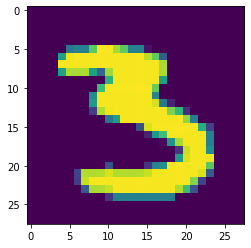

In [16]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))

In [19]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  Xs, Ys = data
  for y in Ys:
    counter_dict[int(y)] += 1
    total += 1
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [20]:
for i in counter_dict:
  print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


Part 3: Build the network (https://www.youtube.com/watch?v=ixathu7U-LQ)

In [22]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
class KarenNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 10)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)

    return F.log_softmax(x, dim=1)

net = KarenNet()
print(net)

KarenNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
)


In [25]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)
output = net(X)
print(output)

tensor([[-2.2281, -2.3957, -2.2381, -2.2102, -2.2470, -2.3870, -2.2249, -2.4712,
         -2.4404, -2.2302]], grad_fn=<LogSoftmaxBackward0>)


Part 4: Training the network (https://www.youtube.com/watch?v=9j-_dOze4IM&t=350s)

In [26]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3
for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of featuresets and labels
    X, y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output, y)
    loss.backward()
    optimizer.step()
  print(loss)

tensor(0.0219, grad_fn=<NllLossBackward0>)
tensor(0.2480, grad_fn=<NllLossBackward0>)
tensor(0.0018, grad_fn=<NllLossBackward0>)


Validate the network

In [28]:
correct = 0
total = 0

# evaluation mode
net.eval()
with torch.no_grad():
  for data in testset:
    X, y = data
    output = net(X.view(-1, 784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total += 1

print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.966


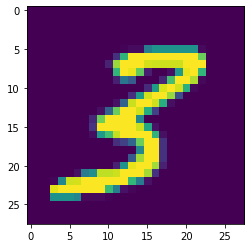

tensor(3)


In [32]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28, 28))
plt.show()

print(torch.argmax(net(X[0].view(-1, 784))[0]))

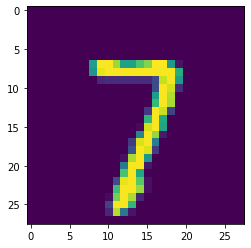

tensor(7)


In [34]:
import matplotlib.pyplot as plt
plt.imshow(X[7].view(28, 28))
plt.show()

print(torch.argmax(net(X[7].view(-1, 784))[0]))